In [1]:
import pandas as pd
import geopandas as gpd
import requests as r
import json

from IPython.display import SVG, display

In [128]:
# p = '/home/gk/vscode/RITA_LAST_NEW/industrial-location/api/app/data/cities.geojson'
# cities = gpd.read_file(p)
# cities.drop(columns=['estimate']).rename(columns={'estimate2':'estimate'}).to_file(p)

In [129]:
# ontology = pd.read_csv("app/data/ontology.csv", index_col=0)
# graduates = pd.read_csv("app/data/graduates.csv", index_col=0)
# vacancy = pd.read_parquet("app/data/vacancy.gzip")
# responses = pd.read_parquet("app/data/responses.gzip")
# cv = pd.read_parquet("app/data/cv.gzip")
# cities = gpd.read_file("app/data/cities.geojson")

In [2]:
test_request = {"workforce_type":"all","specialities":{"0":0.9,"1":1,"4":0.1,"8":0.5,"10":0.9,"11":0.2,"14":1,"16":1,"17":0.6,"18":0.5,"22":1},"edu_groups":{"3":0.1,"5":0.5,"12":0.7,"20":0.5,"21":0.6}}

In [3]:
# responses = r.post('http://10.32.1.62:5500/api/calculation/estimates', json=test_request)
# responses = r.post('http://172.17.0.2:5000/api/calculation/estimates', json=test_request)
responses = r.post('http://0.0.0.0:5000/api/calculation/estimates', json=test_request)

In [4]:
responses

<Response [200]>

In [5]:
gpd.GeoDataFrame.from_features(responses.json()['links'])

,geometry,city_source,city_destination,num_responses
0,"LINESTRING (53.35677 83.71391, 53.39000 83.94000)","Алтайский край, Барнаул","Алтайский край, Новоалтайск",7
1,"LINESTRING (56.99938 40.97283, 54.20000 37.57000)","Ивановская область, Иваново","Тульская область, Тула",7
2,"LINESTRING (56.82000 53.19000, 54.20000 37.57000)","Удмуртия, Ижевск","Тульская область, Тула",7
3,"LINESTRING (68.14000 33.28000, 56.33221 30.55086)","Мурманская область, Оленегорск","Псковская область, Великие Луки",7
4,"LINESTRING (56.47457 43.57798, 56.30000 43.93000)","Нижегородская область, Балахна","Нижегородская область, Нижний Новгород",7
...,...,...,...,...
378,"LINESTRING (59.96000 30.44000, 55.82734 37.82776)","Санкт-Петербург, Санкт-Петербург","Москва, Москва",53
379,"LINESTRING (59.96000 30.44000, 59.56000 30.13000)","Санкт-Петербург, Санкт-Петербург","Ленинградская область, Гатчина",54
380,"LINESTRING (56.60000 84.88000, 56.49000 84.95000)","Томская область, Северск","Томская область, Томск",58
381,"LINESTRING (55.82734 37.82776, 55.49798 37.81929)","Москва, Москва","Московская область, Видное",58


In [6]:
estimates = gpd.GeoDataFrame.from_features(responses.json()['estimates'])
links = gpd.GeoDataFrame.from_features(responses.json()['links'])

In [7]:
estimates

,geometry,region_city,region,city,estimate,city_category,population,ueqi_score,ueqi_residential,ueqi_street_networks,...,vacancies_chemicals,vacancies_coal_and_metal_ext,vacancies_electronics,vacancies_ferrous_metallurgy,vacancies_machinery,vacancies_nonferrous_metallurgy,vacancies_oil_and_gas_ext,vacancies_pharmacy,vacancies_shipbuilding,vacancies_total
0,POINT (52.647 90.098),"Хакасия, Абаза",None,None,0.356,Малый город,12055,172,36,34,...,115,538,441,647,412,647,538,115,630,1965
1,POINT (53.740 91.450),"Хакасия, Абакан",None,None,0.805,Большой город,185348,210,36,37,...,141,794,642,1028,888,1028,794,131,1126,3495
2,POINT (53.680 53.640),"Оренбургская область, Абдулино",None,None,0.627,Малый город,16987,157,34,23,...,90,357,275,377,291,377,357,81,390,1236
3,POINT (44.860 38.150),"Краснодарский край, Абинск",None,None,0.744,Малый город,38866,163,30,29,...,122,567,453,726,523,726,567,117,720,2641
4,POINT (55.900 53.920),"Башкортостан, Агидель",None,None,0.579,Малый город,14002,203,35,49,...,2,99,109,125,59,125,99,2,147,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,POINT (58.680 52.180),"Кировская область, Омутнинск",None,None,0.697,Малый город,19371,151,26,33,...,88,256,241,303,175,303,256,88,325,888
1102,POINT (56.054 59.595),"Челябинская область, Нязепетровск",None,None,0.707,Малый город,10198,166,23,30,...,15,32,36,66,63,66,32,9,71,113
1103,POINT (54.099 36.247),"Тульская область, Чекалин",None,None,0.396,Малый город,904,178,22,31,...,16,55,66,79,46,79,55,16,83,259
1104,POINT (57.030 29.330),"Псковская область, Новоржев",None,None,0.149,Малый город,3195,174,18,31,...,16,97,106,114,50,114,97,16,123,328


In [ ]:
# estimates.to_file('is_it_cities.geojson')

In [ ]:
# gpd.read_file('/home/gk/vscode/RITA_LAST_NEW/industrial-location/api/app/data/cities.geojson')

In [ ]:
# pd.plotting.scatter_matrix(estimates[['vacancy_count', 'factories_total']], figsize=(6,6), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)


In [ ]:
# from catboost import CatBoostRegressor

In [8]:
estimates[
    [
        "region_city",
        "estimate",
        "num_in_migration",
        "graduates_weighted_sum",
        "graduates_forecast_sum_number",
        "cv_count_weighted_sum",
        "one_vacancy_out_response",
        "probability_to_move"
    ]
].sort_values(by='estimate').tail(15)

,region_city,estimate,num_in_migration,graduates_weighted_sum,graduates_forecast_sum_number,cv_count_weighted_sum,one_vacancy_out_response,probability_to_move
746,"Саратовская область, Саратов",0.925,105.550068,6129.0,12507.0,178.1,0.058,1.139676
167,"Воронежская область, Воронеж",0.926,155.789333,5314.5,11868.0,282.9,0.125,0.937624
638,"Омская область, Омск",0.931,58.560615,8699.9,17591.0,375.3,0.039,1.682917
427,"Красноярский край, Красноярск",0.932,363.024972,9916.2,19918.0,277.1,0.226,0.314254
725,"Ростовская область, Ростов-на-Дону",0.934,523.887747,14558.7,27771.0,178.5,0.280,0.346353
665,"Пермский край, Пермь",0.937,202.739010,2792.3,7147.0,551.8,0.110,0.802269
742,"Самарская область, Самара",0.939,252.459603,14019.5,26441.0,221.2,0.164,0.717425
583,"Нижегородская область, Нижний Новгород",0.942,396.536933,8696.4,16952.0,146.9,0.130,0.568858
912,"Башкортостан, Уфа",0.945,139.994489,8980.2,18172.0,322.3,0.034,1.124618
318,"Татарстан, Казань",0.950,281.585637,11970.6,24257.0,296.7,0.115,0.851863


In [9]:
estimates.loc[743,:].to_frame().T.iloc[:, 17:30].head()

,min_salary,median_salary,probability_to_move,num_in_migration,num_out_migration,one_vacancy_out_response,num_responses,graduates_forecast_sum_number,graduates_forecast_number,specialists_sum_number,specialists_number,harsh_climate,cv_count_weighted_sum
743,None,30000,0.289343,913.752022,None,0.238,None,57559.0,"{'Электроника, радиотехника и системы связи (В...",982.0,"{'Инженер по качеству': 44, 'Инженер-конструкт...",False,735.2


In [10]:
estimates.loc[1047,:].to_frame().T.iloc[:, 17:30].head()

,min_salary,median_salary,probability_to_move,num_in_migration,num_out_migration,one_vacancy_out_response,num_responses,graduates_forecast_sum_number,graduates_forecast_number,specialists_sum_number,specialists_number,harsh_climate,cv_count_weighted_sum
1047,None,15000,7.420429,0.343631,None,0.029,None,0.0,None,4.0,"{'Инженер-конструктор': 1, 'Оператор, аппаратч...",False,2.1


In [ ]:
# gpd.GeoDataFrame.from_features(responses.json()['estimates'])

In [ ]:
# estimates.to_file('estimates_test.geojson')

In [12]:
test_request = {
  "city": "Пермский край, Пермь"
}

# responses = r.post('http://10.32.1.62:5500/api/calculation/connection', json=test_request)
# responses = r.post('http://172.17.0.2:5000/api/calculation/connection', json=test_request)
responses = r.post('http://0.0.0.0:5000/api/calculation/connection', json=test_request)

In [13]:
responses.json()

{'migration_link': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'geometry': {'coordinates': [[51.51, 81.21], [58.02, 56.28]],
     'type': 'LineString'},
    'properties': {'cluster_center_cv': 'Алтайский край, Рубцовск',
     'cluster_center_vacancy': 'Пермский край, Пермь',
     'responses': 1,
     'direction': 'in'},
    'id': '0',
    'bbox': None},
   {'type': 'Feature',
    'geometry': {'coordinates': [[54.75, 56.03], [58.02, 56.28]],
     'type': 'LineString'},
    'properties': {'cluster_center_cv': 'Башкортостан, Уфа',
     'cluster_center_vacancy': 'Пермский край, Пермь',
     'responses': 1,
     'direction': 'in'},
    'id': '1',
    'bbox': None},
   {'type': 'Feature',
    'geometry': {'coordinates': [[56.29, 54.95], [58.02, 56.28]],
     'type': 'LineString'},
    'properties': {'cluster_center_cv': 'Башкортостан, Янаул',
     'cluster_center_vacancy': 'Пермский край, Пермь',
     'responses': 1,
     'direction': 'in'},
    'id': '2',
    'bbox'

In [14]:
migration_link = gpd.GeoDataFrame.from_features(responses.json()['migration_link'])

In [15]:
agglomeration_links = gpd.GeoDataFrame.from_features(responses.json()['agglomeration_links'])
agglomeration_nodes = gpd.GeoDataFrame.from_features(responses.json()['agglomeration_nodes'])

In [16]:
agglomeration_nodes.head()

,geometry,cluster_city
0,POINT (56.25878 57.37472),"Пермский край, Подсобное хозяйство"
1,POINT (56.22511 57.39162),"Пермский край, Белая Гора"
2,POINT (56.33140 57.43330),"Пермский край, Бым"
3,POINT (56.08450 57.53316),"Пермский край, Сухобизярка"
4,POINT (56.49774 57.60248),"Пермский край, Сухо-Платошино"


In [17]:
# estimates.set_index('region_city', inplace=True)
estimates2 = estimates.copy()
# estimates2 = gpd.read_file('/home/gk/vscode/RITA_LAST_NEW/industrial-location/api/app/data/is_it_cities.geojson')

cols = [
        "ueqi_residential",
        "ueqi_street_networks",
        "ueqi_green_spaces",
        "ueqi_public_and_business_infrastructure",
        "ueqi_social_and_leisure_infrastructure",
        "ueqi_citywide_space",
        "factories_total",
        "median_salary",
        ]
city_name = "Пермский край, Пермь"
estimates2.loc[estimates2['region_city'] == city_name, cols] = [60,60,60,60,60,60,80,100_000]
# estimates2.loc[estimates2['region_city'] == city_name, cols] = [0,0,0,0,0,0,2,10_000]

In [18]:
"city_category", 
"harsh_climate", 
"ueqi_residential", 
"ueqi_street_networks", 
"ueqi_green_spaces", 
"ueqi_public_and_business_infrastructure", 
"ueqi_social_and_leisure_infrastructure",
"ueqi_citywide_space",            
"factories_total",
'median_salary'
                

'median_salary'

In [257]:
arr = shap_values.features_name

In [258]:
estimates2[estimates2['region_city']==city_name].iloc[:,:20]

,region_city,region,city,estimate,city_category,population,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,factories_total,vacancy_count,max_salary,min_salary,median_salary,probability_to_move,num_in_migration
665,"Пермский край, Пермь",None,None,0.907,Крупнейший город,1027153,191,60,60,60,60,60,60,20,1838.0,None,None,50000,1.246465,162.651201


In [20]:

test_request = {
  "city_name": city_name,
  "plot": True,
  'estimates_table': json.loads(estimates2.to_json()),
}

# responses = r.post('http://10.32.1.62:5500/api/calculation/prediction', json=test_request)
# responses = r.post('http://172.17.0.2:5000/api/calculation/prediction', json=test_request)
responses = r.post('http://0.0.0.0:5000/api/calculation/prediction', json=test_request)

In [21]:
responses.json()['city_features']

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'coordinates': [58.02, 56.28], 'type': 'Point'},
   'properties': {'region': None,
    'city': None,
    'estimate_after': 0.906,
    'city_category': 'Крупнейший город',
    'population': 1027153,
    'ueqi_score': 191,
    'ueqi_residential': 60,
    'ueqi_street_networks': 60,
    'ueqi_green_spaces': 60,
    'ueqi_public_and_business_infrastructure': 60,
    'ueqi_social_and_leisure_infrastructure': 60,
    'ueqi_citywide_space': 60,
    'factories_total': 80,
    'vacancy_count': 1838.0,
    'max_salary': None,
    'min_salary': None,
    'median_salary': 100000,
    'probability_to_move': 0.3546870060354315,
    'num_in_migration_after': 1230.3694072655458,
    'num_out_migration': None,
    'one_vacancy_out_response': 0.669,
    'num_responses': None,
    'graduates_forecast_sum_number': 7147.0,
    'graduates_forecast_number': "{'Электроника, радиотехника и системы связи (ВПО)': 1292, 'Управление в 

In [172]:
import joblib as jbl

with open("app/shap_plots/explanation.joblib", "rb") as f:
    shap_values = jbl.load(f)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [178]:

# svg_plot = plot_local_waterfall(shap_values_slice)

.values =
array([[ 3.99538574e-02,  4.97869085e+01,  4.51563486e+00, ...,
         6.99950974e-01,  2.60062067e-01,  2.55246330e+02],
       [-7.17969083e-03,  1.36085935e-01,  1.07938189e-02, ...,
         6.02331117e-02,  8.42987680e-04,  2.60472105e+00],
       [-6.93056205e-03, -3.17713623e-02,  1.01925054e-01, ...,
         4.22847389e-02,  5.47261509e-04,  1.97754752e+00],
       ...,
       [-4.48206673e-04,  1.38736304e-03, -4.97170009e-03, ...,
        -2.22522284e-03,  2.47081081e-04, -4.82253808e-02],
       [-4.03594186e-04,  3.31818306e-03, -5.13592164e-03, ...,
        -2.01279048e-03,  2.27899585e-04, -5.41366288e-02],
       [ 4.49123188e-02,  6.40696572e-01,  1.75314612e-01, ...,
        -1.47043161e-01,  4.55611908e-02,  5.95055707e+00]])

.base_values =
array([0.14711798, 0.14711798, 0.14711798, ..., 0.14711798, 0.14711798,
       0.14711798])

.data =
array([[0.0000000e+00, 4.4000000e+01, 3.2000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
    

In [150]:
estimates2 = estimates2[[
        "estimate",
        "region_city",
        "city_category", 
        "harsh_climate", 
        "ueqi_residential", 
        "ueqi_street_networks", 
        "ueqi_green_spaces", 
        "ueqi_public_and_business_infrastructure", 
        "ueqi_social_and_leisure_infrastructure",
        "ueqi_citywide_space",
        "cvs_count_all",
        "vacancy_count",
        "factories_total",
        'median_salary',
        "cv_count_weighted_sum",
        "graduates_weighted_sum",
        "geometry"
        ]]

In [165]:
c

,region_city,region,city,estimate,city_category,population,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,...,vacancies_coal_and_metal_ext,vacancies_electronics,vacancies_ferrous_metallurgy,vacancies_machinery,vacancies_nonferrous_metallurgy,vacancies_oil_and_gas_ext,vacancies_pharmacy,vacancies_shipbuilding,vacancies_total,geometry
0,"Хакасия, Абаза",None,None,0.348,Малый город,12055,172,36,34,27,...,538,441,647,412,647,538,115,630,1965,POINT (52.64711 90.09757)
1,"Хакасия, Абакан",None,None,0.744,Большой город,185348,210,36,37,24,...,794,642,1028,888,1028,794,131,1126,3495,POINT (53.74000 91.45000)
2,"Оренбургская область, Абдулино",None,None,0.482,Малый город,16987,157,34,23,12,...,357,275,377,291,377,357,81,390,1236,POINT (53.68000 53.64000)
3,"Краснодарский край, Абинск",None,None,0.687,Малый город,38866,163,30,29,20,...,567,453,726,523,726,567,117,720,2641,POINT (44.86000 38.15000)
4,"Башкортостан, Агидель",None,None,0.502,Малый город,14002,203,35,49,27,...,99,109,125,59,125,99,2,147,359,POINT (55.90000 53.92000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,"Кировская область, Омутнинск",None,None,0.576,Малый город,19371,151,26,33,22,...,256,241,303,175,303,256,88,325,888,POINT (58.68000 52.18000)
1102,"Челябинская область, Нязепетровск",None,None,0.634,Малый город,10198,166,23,30,25,...,32,36,66,63,66,32,9,71,113,POINT (56.05392 59.59545)
1103,"Тульская область, Чекалин",None,None,0.319,Малый город,904,178,22,31,33,...,55,66,79,46,79,55,16,83,259,POINT (54.09853 36.24722)
1104,"Псковская область, Новоржев",None,None,0.151,Малый город,3195,174,18,31,28,...,97,106,114,50,114,97,16,123,328,POINT (57.03000 29.33000)


In [213]:
import os

os.getcwd()+'/processed'

'/home/gk/vscode/RITA_LAST_NEW/industrial-location/api/processed'

In [214]:
import shutil

shutil.rmtree('/home/gk/vscode/RITA_LAST_NEW/industrial-location/api/app/processed')

In [361]:
# c = gpd.read_file('/home/gk/vscode/RITA_LAST_NEW/industrial-location/api/app/data/is_it_cities.geojson')
# c[c['region_city'] == 'Санкт-Петербург, Санкт-Петербург']
import shutil

c = estimates2.copy()
cols = [
        "ueqi_residential",
        "ueqi_street_networks",
        "ueqi_green_spaces",
        "ueqi_public_and_business_infrastructure",
        "ueqi_social_and_leisure_infrastructure",
        "ueqi_citywide_space",
        "factories_total",
        "median_salary",
        ]
city_name = "Пермский край, Пермь"
c.loc[c['region_city'] == city_name, cols] = [60,60,60,60,60,50,9,30_000]
# c.loc[c['region_city'] == city_name, cols] = [0,0,0,0,0,0,2,10_000]

# c.set_index('region_city', inplace=True)

test_request = {
  "city_name": city_name,
  "plot": True,
  'estimates_table': json.loads(c.to_json()),
}

# responses = r.post('http://10.32.1.62:5500/api/calculation/prediction', json=test_request)
# responses = r.post('http://172.17.0.2:5000/api/calculation/prediction', json=test_request)
responses = r.post('http://127.0.0.1:8000/api/calculation/prediction', json=test_request)

In [344]:
responses

<Response [200]>

In [119]:
gpd.GeoDataFrame.from_features(responses.json()['city_features']).columns

Index(['geometry', 'estimate_after', 'city_category', 'harsh_climate',
       'ueqi_residential', 'ueqi_street_networks', 'ueqi_green_spaces',
       'ueqi_public_and_business_infrastructure',
       'ueqi_social_and_leisure_infrastructure', 'ueqi_citywide_space',
       'cvs_count_all', 'vacancy_count', 'factories_total', 'median_salary',
       'cv_count_weighted_sum', 'graduates_weighted_sum',
       'migrations_to_selected_city', 'migrations_to_each_city',
       'migrations_from_each_city', 'probability_to_move',
       'num_in_migration_after', 'one_vacancy_out_response'],
      dtype='object')

In [120]:
estimates.loc[665,['geometry', 'estimate', 'city_category', 'harsh_climate',
       'ueqi_residential', 'ueqi_street_networks', 'ueqi_green_spaces',
       'ueqi_public_and_business_infrastructure',
       'ueqi_social_and_leisure_infrastructure', 'ueqi_citywide_space',
       'cvs_count_all', 'vacancy_count', 'factories_total', 'median_salary',
       'cv_count_weighted_sum', 'graduates_weighted_sum',
       'migrations_to_selected_city', 'migrations_to_each_city',
       'migrations_from_each_city', 'probability_to_move',
       'num_in_migration', 'one_vacancy_out_response']].to_frame().T

,geometry,estimate,city_category,harsh_climate,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,...,factories_total,median_salary,cv_count_weighted_sum,graduates_weighted_sum,migrations_to_selected_city,migrations_to_each_city,migrations_from_each_city,probability_to_move,num_in_migration,one_vacancy_out_response
665,POINT (58.02 56.28),0.907,Крупнейший город,False,32,32,37,24,30,36,...,101,22000,551.8,2792.3,3.902338,162.651201,202.73901,1.246465,162.651201,0.088


In [328]:
shap_values.feature_names[14,24]

TypeError: list indices must be integers or slices, not tuple

In [362]:

gpd.GeoDataFrame.from_features(responses.json()['city_features']).loc[:,["estimate_after", "num_in_migration_after"]]

,estimate_after,num_in_migration_after
0,0.815,528.641065


In [263]:
migr = responses.json()['new_links']
migr

{'type': 'FeatureCollection', 'features': [], 'bbox': None}

In [87]:
gpd.GeoDataFrame.from_features(migr)

,geometry,cluster_center_cv,cluster_center_vacancy,responses,direction
0,"LINESTRING (51.510 81.210, 58.020 56.280)","Алтайский край, Рубцовск","Пермский край, Пермь",1,in
1,"LINESTRING (54.750 56.030, 58.020 56.280)","Башкортостан, Уфа","Пермский край, Пермь",1,in
2,"LINESTRING (56.290 54.950, 58.020 56.280)","Башкортостан, Янаул","Пермский край, Пермь",1,in
3,"LINESTRING (52.060 113.490, 58.020 56.280)","Забайкальский край, Чита","Пермский край, Пермь",1,in
4,"LINESTRING (55.827 37.828, 58.020 56.280)","Москва, Москва","Пермский край, Пермь",5,in
5,"LINESTRING (55.970 38.030, 58.020 56.280)","Московская область, Фрязино","Пермский край, Пермь",1,in
6,"LINESTRING (67.640 53.010, 58.020 56.280)","Ненецкий автономный округ, Нарьян-Мар","Пермский край, Пермь",1,in
7,"LINESTRING (56.240 43.520, 58.020 56.280)","Нижегородская область, Дзержинск","Пермский край, Пермь",2,in
8,"LINESTRING (56.300 43.930, 58.020 56.280)","Нижегородская область, Нижний Новгород","Пермский край, Пермь",6,in
9,"LINESTRING (59.160 57.570, 58.020 56.280)","Пермский край, Александровск","Пермский край, Пермь",3,in


In [309]:
new_links = gpd.GeoDataFrame.from_features(responses.json()['new_links'])
new_links.set_index("cluster_center_cv").equals(migration_link.set_index("cluster_center_cv").loc[new_links["cluster_center_cv"]])

KeyError: "['Алтайский край, Барнаул', 'Амурская область, Благовещенск', 'Архангельская область, Архангельск', 'Архангельская область, Котлас', 'Архангельская область, Северодвинск', 'Башкортостан, Мелеуз', 'Белгородская область, Белгород', 'Бурятия, Гусиноозерск', 'Бурятия, Улан-Удэ', 'Владимирская область, Александров', 'Владимирская область, Гусь-Хрустальный', 'Владимирская область, Муром', 'Волгоградская область, Волгоград', 'Волгоградская область, Волжский', 'Вологодская область, Бабаево', 'Вологодская область, Череповец', 'Воронежская область, Воронеж', 'Забайкальский край, Сретенск', 'Ивановская область, Комсомольск', 'Иркутская область, Ангарск', 'Иркутская область, Братск', 'Калужская область, Калуга', 'Калужская область, Обнинск', 'Калужская область, Таруса', 'Камчатский край, Елизово', 'Кемеровская область, Кемерово', 'Кировская область, Киров', 'Кировская область, Сосновка', 'Коми, Инта', 'Коми, Сосногорск', 'Коми, Сыктывкар', 'Коми, Усинск', 'Коми, Ухта', 'Краснодарский край, Краснодар', 'Краснодарский край, Лабинск', 'Краснодарский край, Темрюк', 'Краснодарский край, Тихорецк', 'Ленинградская область, Бокситогорск', 'Ленинградская область, Волхов', 'Ленинградская область, Всеволожск', 'Ленинградская область, Гатчина', 'Ленинградская область, Кингисепп', 'Ленинградская область, Кириши', 'Ленинградская область, Кировск', 'Ленинградская область, Мурино', 'Ленинградская область, Никольское', 'Ленинградская область, Сланцы', 'Ленинградская область, Сосновый Бор', 'Ленинградская область, Тихвин', 'Марий Эл, Йошкар-Ола', 'Мордовия, Рузаевка', 'Мордовия, Саранск', 'Московская область, Воскресенск', 'Московская область, Орехово-Зуево', 'Московская область, Химки', 'Московская область, Чехов', 'Мурманская область, Заозерск', 'Новгородская область, Великий Новгород', 'Новгородская область, Холм', 'Омская область, Омск', 'Оренбургская область, Оренбург', 'Оренбургская область, Орск', 'Пермский край, Красновишерск', 'Псковская область, Великие Луки', 'Ростовская область, Белая Калитва', 'Ростовская область, Донецк', 'Рязанская область, Рязань', 'Самарская область, Тольятти', 'Саратовская область, Аткарск', 'Свердловская область, Алапаевск', 'Свердловская область, Каменск-Уральский', 'Свердловская область, Краснотурьинск', 'Свердловская область, Красноуральск', 'Свердловская область, Нижняя Тура', 'Смоленская область, Вязьма', 'Смоленская область, Гагарин', 'Смоленская область, Рославль', 'Смоленская область, Сафоново', 'Смоленская область, Смоленск', 'Ставропольский край, Минеральные Воды', 'Ставропольский край, Ставрополь', 'Татарстан, Лениногорск', 'Томская область, Томск', 'Тульская область, Донской', 'Тульская область, Ефремов', 'Тульская область, Тула', 'Тюменская область, Ишим', 'Тюменская область, Тюмень', 'Ульяновская область, Барыш', 'Ульяновская область, Димитровград', 'Ульяновская область, Ульяновск', 'Хабаровский край, Комсомольск-на-Амуре', 'Челябинская область, Миньяр', 'Челябинская область, Снежинск', 'Челябинская область, Челябинск', 'Чувашия, Новочебоксарск', 'Якутия, Вилюйск', 'Якутия, Якутск', 'Ярославская область, Тутаев', 'Ярославская область, Углич'] not in index"

In [ ]:
slice = estimates["region_city"] == "Пермский край, Пермь"

In [339]:
shap_values.feature_names

['Суровый климат (город соискателя)',
 'Жилье и прилегающие пространства (город соискателя)',
 'Улично-дорожная сеть (город соискателя)',
 'Озелененные пространства (город соискателя)',
 'Общественно-деловая инфраструктура (город соискателя)',
 'Социально-досуговая инфраструктура (город соискателя)',
 'Общегородское пространство (город соискателя)',
 'Количество открытых резюме (город соискателя)',
 'Количество промышленных предприятий (город соискателя)',
 'Медианная зарплата в вакансиях (город соискателя)',
 'Масштаб города - крупнейший (город соискателя)',
 'Масштаб города - крупный (город соискателя)',
 'Масштаб города - малый (город соискателя)',
 'Масштаб города - средний (город соискателя)',
 'Суровый климат (город вакансии)',
 'Жилье и прилегающие пространства (город вакансии)',
 'Улично-дорожная сеть (город вакансии)',
 'Озелененные пространства (город вакансии)',
 'Общественно-деловая инфраструктура (город вакансии)',
 'Социально-досуговая инфраструктура (город вакансии)',
 '

In [336]:
shap_values[:, [14,15, 16, 17, 18, 19, 20, 21, 23, 24]].mean(0)

.values =
array([-0.00037683,  0.00100994,  0.00063084,  0.00101636, -0.00141917,
        0.004739  ,  0.00174444,  0.00488562,  0.00086742,  0.00025377])

.base_values =
0.147117983779752

.data =
array([7.9851441e-02, 3.4698303e+01, 3.2504532e+01, 2.6895073e+01,
       2.6192476e+01, 2.7436396e+01, 3.6620636e+01, 4.4004562e+02,
       2.1731250e+04, 1.3927577e-02], dtype=float32)

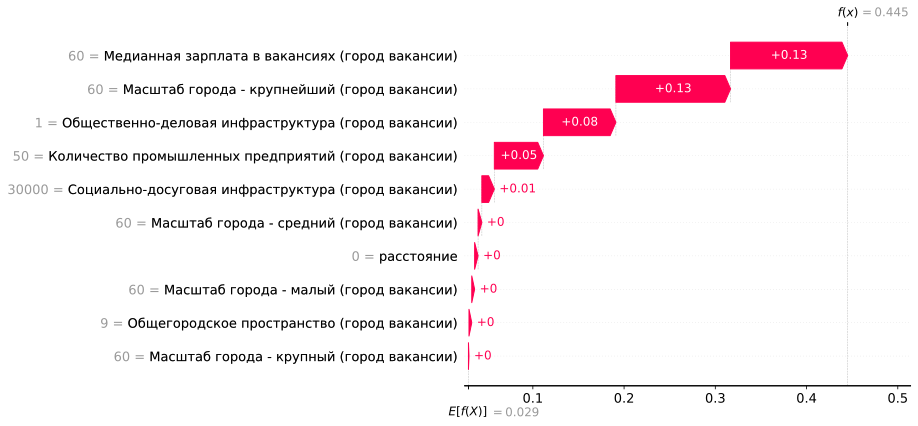

In [363]:
from IPython.display import SVG, display
display(SVG(responses.json()['plot']))

In [ ]:
estimates.columns

In [ ]:
estimates.loc[slice, 'vacancy_count'] -= 100

In [ ]:
estimates.loc[slice, 'median_salary'] += 10000
estimates.loc[slice, 'ueqi_social_and_leisure_infrastructure'] += 10

In [ ]:
city_features = responses.json()['city_features']
gpd.GeoDataFrame.from_features(city_features)[["estimate_after", "estimate_before", "num_in_migration_before", "num_in_migration_after"]]

In [ ]:
from IPython.display import SVG, display
from matplotlib import pyplot as plt
display(SVG(responses.json()['plot']))

In [346]:
response = r.get('http://127.0.0.1:8000/api/calculation/plots')

In [347]:
response.json().keys()

dict_keys(['largest', 'large', 'big', 'average', 'small'])

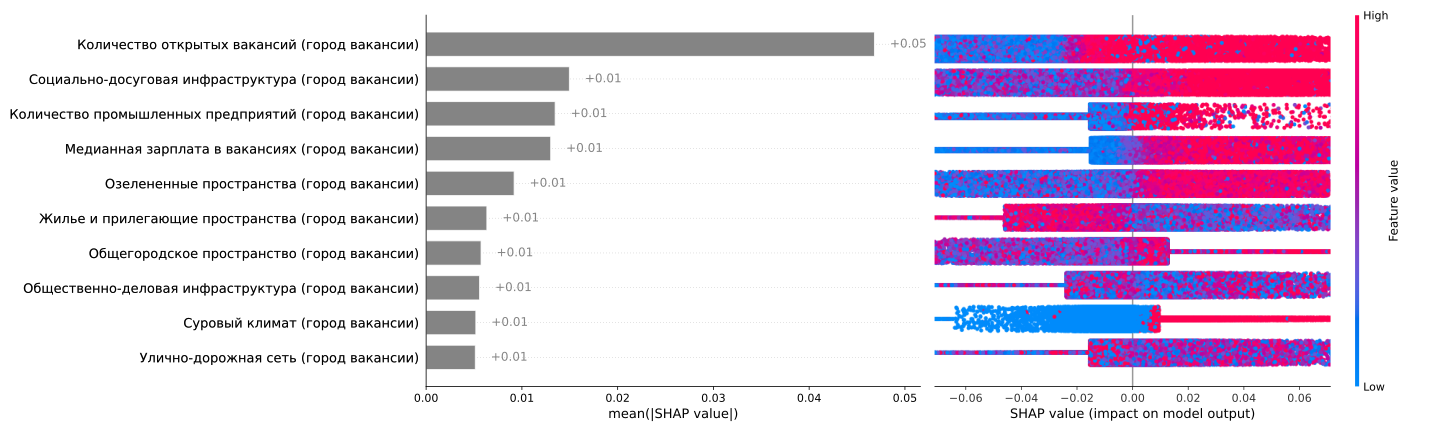

In [348]:
from IPython.display import SVG, display
display(SVG(response.json()['small']))

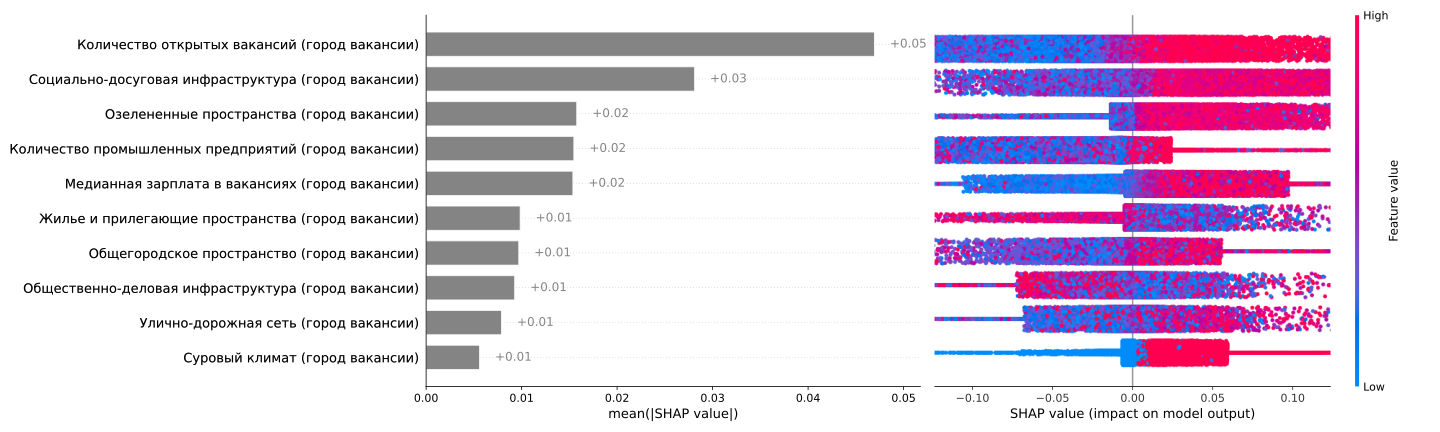

In [349]:
from IPython.display import SVG, display
display(SVG(response.json()['average']))

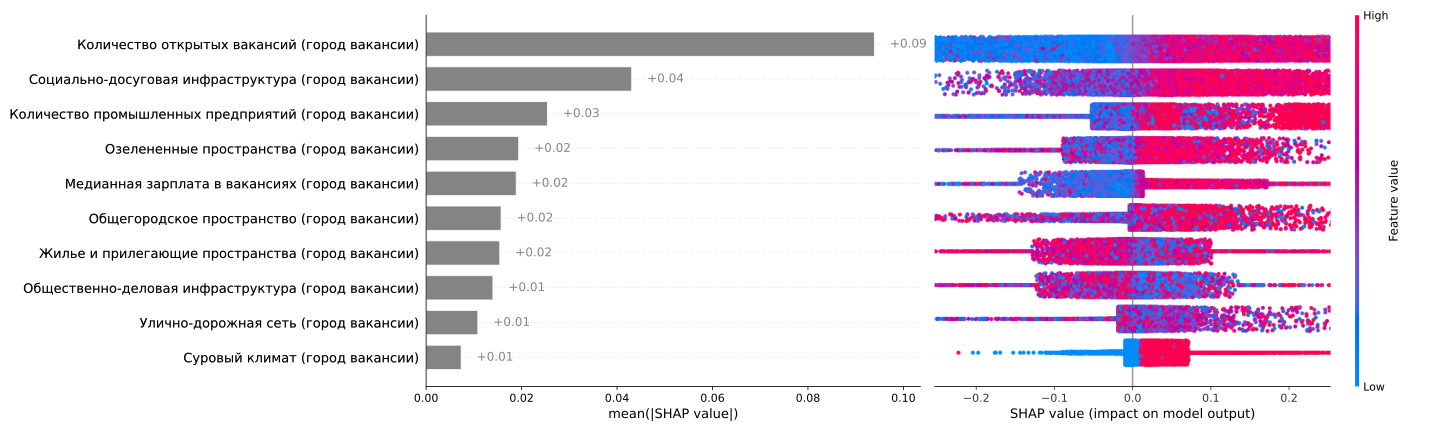

In [350]:
from IPython.display import SVG, display
display(SVG(response.json()['big']))

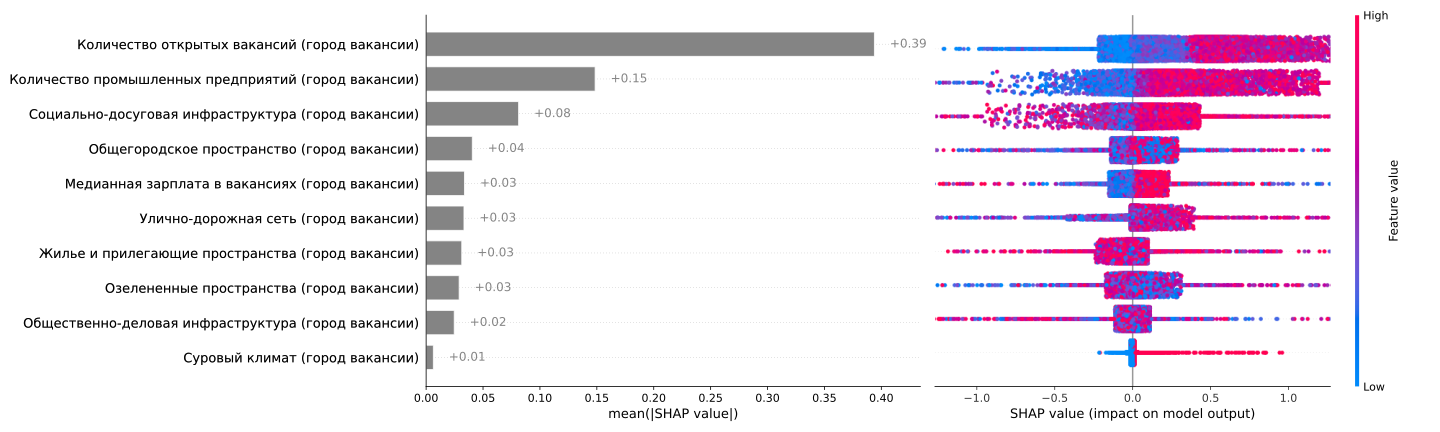

In [351]:
from IPython.display import SVG, display
display(SVG(response.json()['large']))

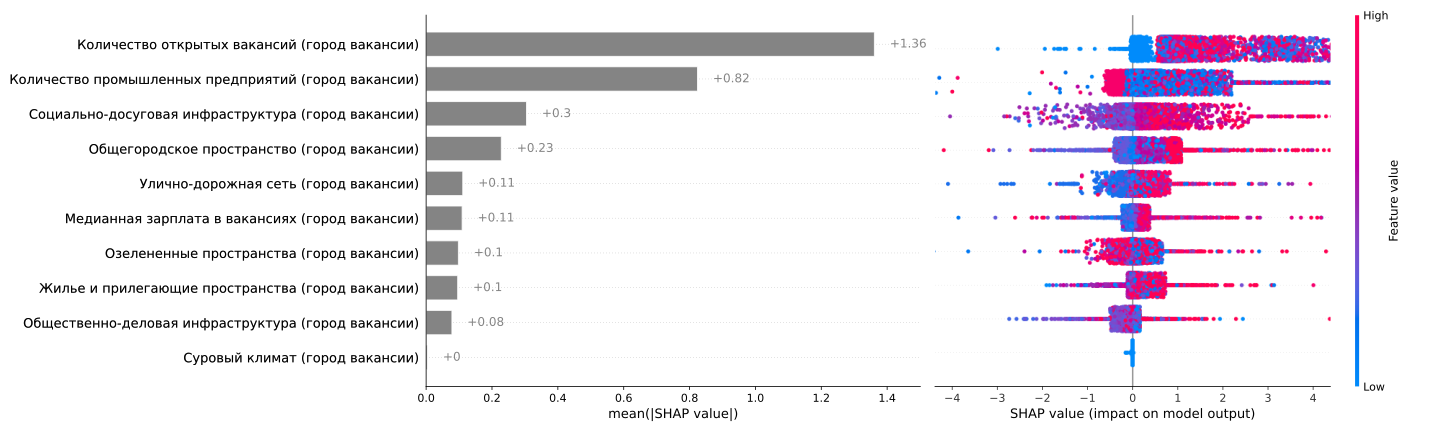

In [352]:
from IPython.display import SVG, display
display(SVG(response.json()['largest']))